In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, cv2
from sklearn.model_selection import train_test_split

# load data from csv
DATA_DIR = "C://Users//farsu//Unity Games//self-driving-car-simulator//data//training//csv//record_log.csv"
data_df = pd.read_csv (DATA_DIR, names=['left', 'center', 'right', 'steering', 'speed'])
X_paths = data_df[['center']].values
y = data_df['steering'].values

print (len(X_paths))

4742


AxesImage(80,52.8;496x369.6)


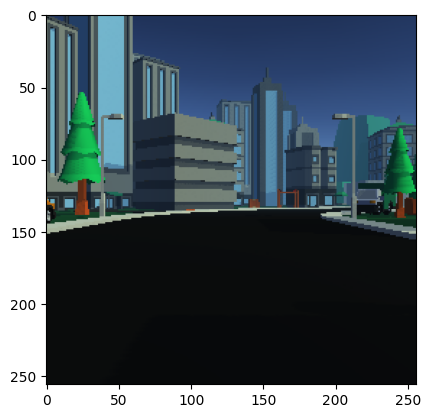

In [41]:
image = cv2.cvtColor (cv2.imread (X_paths[0][0]), cv2.COLOR_BGR2RGB)
print (plt.imshow (image))
plt.show ()


In [42]:
# preprocess image
(IMG_WIDTH, IMG_HEIGHT) = (80, 80)

X = [[0, 0, 0]] * len (X_paths)

for i in range (len (X_paths)):
    image = cv2.cvtColor (cv2.imread (X_paths[i][0]), cv2.COLOR_BGR2RGB)
    image = cv2.resize (image, (IMG_WIDTH, IMG_HEIGHT))
    image = cv2.convertScaleAbs(image, alpha=4, beta=20)
    # image = image[20:76, :, :]
    image = cv2.cvtColor (image, cv2.COLOR_RGB2YUV)
    X[i][0] = (image)

AxesImage(80,52.8;496x369.6)


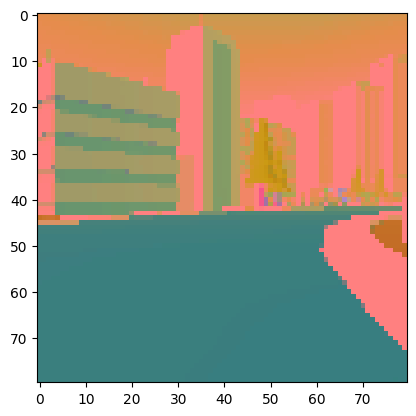

In [43]:
# display preprocessed image
print (plt.imshow (X[50][0]))
plt.show ()

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.2 )

In [54]:
# # convert to image array 
# X = np.array(X, dtype=object)
# y = np.array(y)

# # reshape image array
# X[0][0] = X.reshape(X.shape[0], 80, 80, 3)

# X = X.astype('float32')


ValueError: cannot reshape array of size 14226 into shape (4742,80,80,3)

In [57]:
batch_size = 150
epochs =100
# input image dimensions
img_rows, img_cols = 80, 80
#inputshape = X.shape[1]

In [59]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

from keras import backend as K

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

ValueError: cannot reshape array of size 11379 into shape (3793,1,80,80)

In [27]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D



model = Sequential()
#model.add(Dense(256, activation='relu', input_dim=366))
model.add(Conv2D(64, (3, 3), activation='relu', input_shape = X[1][0].shape))
#model.add(Conv2D(128, (3, 3), activation='relu'))
#model.add(Conv2D(64, (3, 3), init='uniform'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

model.add(Dense(1, activation='linear'))


model.compile(loss='mean_squared_error', # one may use 'mean_absolute_error' as  mean_squared_error
                  optimizer='adam',
                  metrics=[r2_keras] # you can add several if needed
                 )

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 78, 78, 64)        1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 39, 39, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 97344)             0         
                                                                 
 dense (Dense)               (None, 512)               49840640  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                      

In [29]:
# compile model
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam

checkpoint = ModelCheckpoint('model.h5', monitor='val_loss', verbose=1, mode='auto', save_best_only=True)

model.compile(loss="mean_squared_error", optimizer=Adam(learning_rate=1.0e-4), metrics=['accuracy'])

In [34]:
# Training Model

history = model.fit(X, y, batch_size=32, epochs=2, validation_split=0.3, callbacks=[checkpoint])

ValueError: setting an array element with a sequence.